# Analisis de Sentimiento ESP

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

import os, sys
jiazz = os.path.abspath(os.path.join('..'))
print(jiazz)
if jiazz not in sys.path:
    sys.path.append(jiazz)
sys.path

/app


['',
 '/usr/local/lib/python36.zip',
 '/usr/local/lib/python3.6',
 '/usr/local/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/IPython/extensions',
 '/root/.ipython',
 '/app']

In [8]:
from wordcloud import WordCloud, STOPWORDS

def generate_cloudword(pd, image_dims=(800, 400)):
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    W, H = image_dims
    stopwords = set(STOPWORDS)
    data = pd

    wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=250,
      max_font_size=40,
      width=W, height=H,
      random_state=777
     ).generate(str(data['sample_value']))

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

### Create Load Function

In [3]:
from pandas import read_csv, DataFrame
from sklearn.utils import shuffle
from slugify import slugify


def load(filename):
    df = read_csv('../data/%s.csv' % filename)
    return shuffle(df)

In [9]:
df = load('social-sentiment-spanish')
df.head()

sample_float_sentiment  label  \
7515                    0.88      1   
4151                    0.12      0   
8835                    0.91      1   
556                    -0.77     -1   
4706                    0.06      0   

                                           sample_value  
7515  8 aspectos no físicos que hacen atractiva a un...  
4151  el mercurio de valparaiso es el periodico en c...  
8835       hoy voy a beber beber beber a celebrar los k  
556   aqui no c trata si votan o no x este gov el pu...  
4706  la moral por los suelos no es una comedia el e...

## Tokenize Words

In [10]:
from core import Jiazz as J


df['sample_value'] = df['sample_value'].apply(lambda x: J.stemmer(x))
df.head()

sample_float_sentiment  label  \
7515                    0.88      1   
4151                    0.12      0   
8835                    0.91      1   
556                    -0.77     -1   
4706                    0.06      0   

                                           sample_value  
7515                            aspect fisic atract muj  
4151  mercuri valparais period circulacion antigu mu...  
8835                                 beb beb beb celebr  
556   trat vot gov puebl sum desmont elit generalots...  
4706    moral suel comedi espect rie mecan defens actor

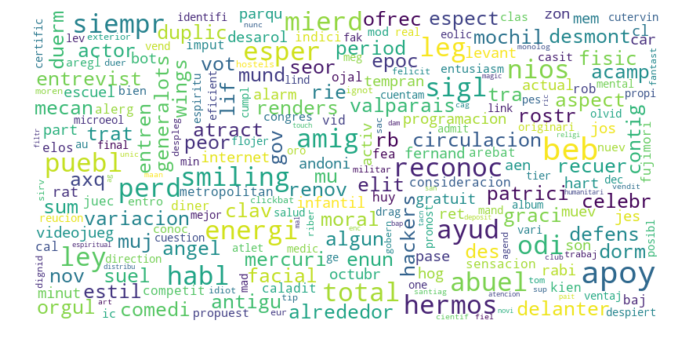

In [11]:
# df_pos = df[df['label'] == 'pos']
# df_neutral = df[df['label'] == 'neutral']
# df_neg = df[df['label'] == 'neg']

generate_cloudword(df)
#generate_cloudword(df_neutral)
#generate_cloudword(df_neg)

### Split Training Dataset

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = shuffle(df)

X, y = df['sample'], df['label']

vect = TfidfVectorizer(use_idf=True, smooth_idf=False)

classes = df.label.unique()
print(classes)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.1,
                                                    random_state=777)

[-1  0  1]


### Entrenamiento

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np



alg = MultinomialNB()
alg = LinearSVC()
#alg = ElasticNet()
#alg = Perceptron(n_jobs=-1, class_weight='balanced')
alg = LogisticRegression()

pipe = Pipeline([('vec', vect), ("clf", alg)])
print('Run Logistic')

param_grid = dict(
    clf__C=[1, .5, 1e3],
    #clf__gamma=[.1, .05],
    clf__dual=[True],    
    
    #clf__n_estimators=[50],
    #clf__penalty=['l2'],
    # clf__alpha=[.1, .01],
    # clf__fit_prior=[False, True],
    
    vec__ngram_range=[(1, 1)],
    vec__analyzer=['word'],
    vec__max_df=[.9],
    vec__norm=['l2'],
    vec__binary=[True],
    vec__use_idf=[True],
    vec__smooth_idf=[True]    
)

shuffle_kfold = KFold(n_splits=4, shuffle=True)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=shuffle_kfold, verbose=5, n_jobs=24, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Run Logistic
Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True 
[CV] clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True 
[CV] clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True 
[CV] clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True 
[CV] clf__C=0.5, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True 
[CV] clf__C=0.5, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ng

[Parallel(n_jobs=24)]: Done   4 out of  12 | elapsed:    2.7s remaining:    5.4s


[CV]  clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.72015065913371, total=   2.1s
[CV]  clf__C=1, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.7239171374764595, total=   2.2s


[Parallel(n_jobs=24)]: Done   7 out of  12 | elapsed:    2.9s remaining:    2.1s


[CV]  clf__C=1000.0, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.6772128060263654, total=   3.8s
[CV]  clf__C=1000.0, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.6779661016949152, total=   3.8s
[CV]  clf__C=1000.0, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.6753295668549906, total=   3.9s
[CV]  clf__C=1000.0, clf__dual=True, vec__analyzer=word, vec__binary=True, vec__max_df=0.9, vec__ngram_range=(1, 1), vec__norm=l2, vec__smooth_idf=True, vec__use_idf=True, score=0.6832391713747646, total=   4.1s


[Parallel(n_jobs=24)]: Done  10 out of  12 | elapsed:    4.3s remaining:    0.9s
[Parallel(n_jobs=24)]: Done  12 out of  12 | elapsed:    4.5s finished


{'clf__C': 1, 'clf__dual': True, 'vec__analyzer': 'word', 'vec__binary': True, 'vec__max_df': 0.9, 'vec__ngram_range': (1, 1), 'vec__norm': 'l2', 'vec__smooth_idf': True, 'vec__use_idf': True}
0.7249529190207157


## Validacion

In [22]:
from sklearn.metrics import classification_report, accuracy_score

print("[Val set] Best %s: %.4f" % ('accuracy', grid_search.best_score_))
y_pred = grid_search.predict(X_test)


print(classification_report(y_test, y_pred, target_names=classes))
accuracy = accuracy_score(y_test, y_pred)

print("[Test set] Accuracy: %.4f" % accuracy)
alg = grid_search



[Val set] Best accuracy: 0.7250


TypeError: object of type 'numpy.int64' has no len()

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted label')


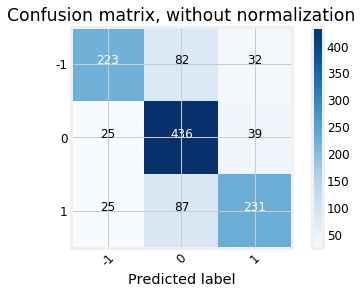

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

plt.show()


## Generate Binary Model

In [17]:
from core import Jiazz as J


J.compress(grid_search, 'sentiment_esp')

'sentiment_esp'

### Test Binary Model

In [18]:
from core import Jiazz as J


alg = J.load('sentiment_esp')

text = "¡Ahora #HavanaRemix está sonando en @radioondacero! ¡No dejen de pedirla! @Camila_Cabello ft. @daddy_yankee"
J.score(alg, text)

{'tag': 1, 'scores': {}}